In [44]:
import pandas as pd 
import numpy as np
%matplotlib inline

data = pd.read_csv("./StudentPerformance.csv")

data 

# checking for null values
data.isnull().count()

data.notnull().count()

# using Label Encoding  
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data

data['placement_offer_count'] = le.fit_transform(data['placement_offer_count'])

data

# replacing null values with NaN
missing_values = ["Na", "na"]

df = pd.read_csv("StudentPerformance.csv", na_values =missing_values)

df

# filling null values with a single value

df = pd.read_csv("StudentPerformance.csv")
df
df = df.fillna(0)
df

df['math_score']= df['math_score'].fillna(df['math_score'].mean()) # filling missing values with mean
df['math_score']= df['math_score'].fillna(df['math_score'].median()) # filling missing values with median
df['math_score']= df['math_score'].fillna(df['math_score'].mode()) # filling missing values with mode
df['math_score']= df['math_score'].fillna(df['math_score'].min()) # filling missing values with min 
df['math_score']= df['math_score'].fillna(df['math_score'].max()) # filling missing values with max

# use inplace=True to avoid df['x'] = df['x'].something

# filling null values using replace() methond
df.replace(to_replace=np.NaN, value=-99)

# Deleting null values using dropna() method 
df = pd.read_csv("StudentPerformance.csv")
df
df.dropna() # to drop row with at least 1 null value
df.dropna(how='all') # to drop rows having all values null
df.dropna(axis=1) # to drop column with at least 1 null value
df.dropna(axis=0, how='any') # to drop rows with at least 1 null value in a row
df


,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count
0,25,64,78,54,2018,1
1,63,77,61,71,2021,1
2,74,77,62,60,2021,1
3,78,61,60,54,2019,1
4,60,60,4,78,2018,2
5,60,87,78,64,2021,1
6,99,71,64,22,2020,1
7,79,78,79,80,2018,2
8,73,99,73,62,2021,1
9,79,67,63,78,2021,2


In [45]:
# detecting outliers using boxplot
df = pd.read_csv("StudentPerformance.csv")
df
col=['math_score', 'reading_score', 'writing_score', 'placement_offer_count']
df.boxplot(col)
print(np.where(df['math_score']>90))
print(np.where(df['reading_score']<25))
print(np.where(df['writing_score']<30))

(array([6]),)
(array([14, 17, 32, 36]),)
(array([ 4, 10, 13, 16, 30]),)


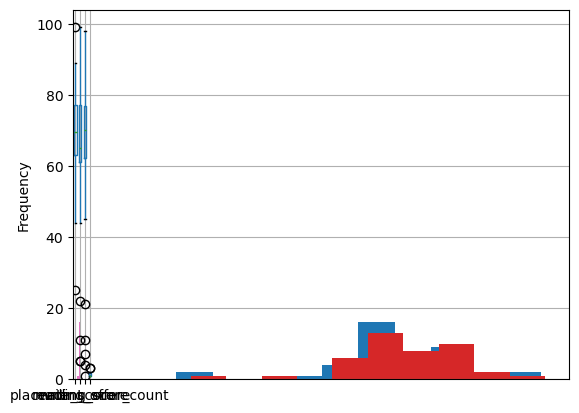

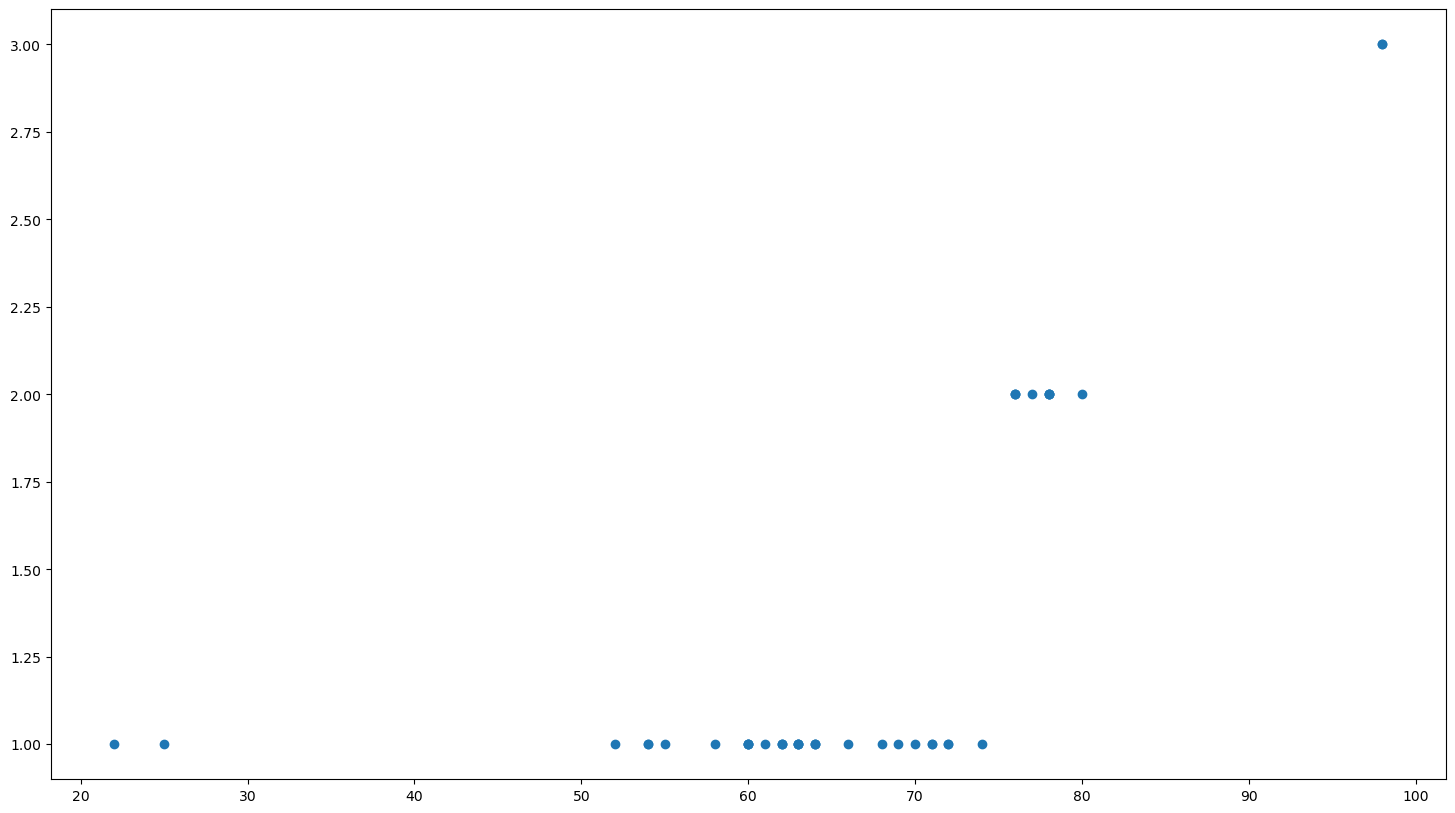

In [46]:
from matplotlib import pyplot as plt
# detecting outlers using scatterplot
fig, ax = plt.subplots(figsize= (18,10))
ax.scatter(df['placement_score'], df['placement_offer_count'])
plt.show()


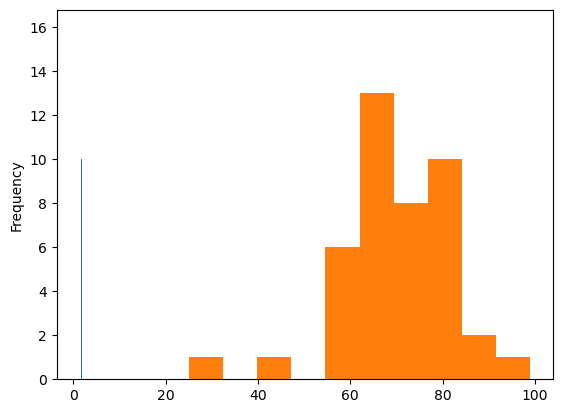

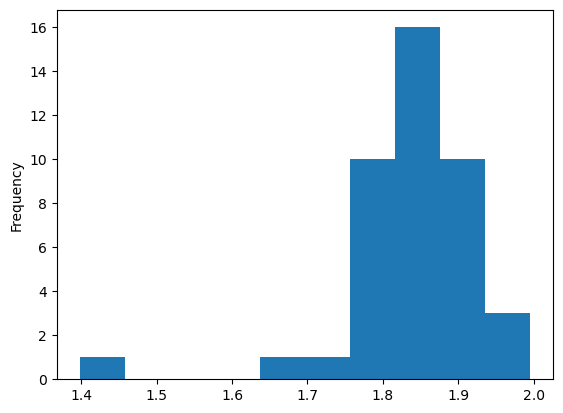

In [48]:
# detecting outlers using Z score
from scipy import stats
z = np.abs(stats.zscore(df['math_score']))
# print(z)
threshold = 0.18

sample_outlers = np.where(z < threshold)	
df['math_score'].plot(kind='hist')
plt.show()

df['log_math'] = np.log10(df['math_score'])
df['log_math'].plot(kind='hist')
plt.show()
